In [36]:
import pandas as pd
import numpy as np

In [67]:
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [68]:
df = pd.read_csv('C://Users//DELL//Desktop//Machine_learning//Exploratory_Data_Analysis//train.csv', 
                 usecols = ['Age','Fare','Survived']
                )

In [69]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [70]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Filling missing values in Age column

In [71]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [72]:
df['Age'].fillna(value = df['Age'].mean(), inplace=True)

In [73]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [74]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [75]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [76]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train Test split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [78]:
X_train.head()

,Age,Fare
465,38.0,7.0500
202,34.0,6.4958
317,54.0,14.0000
599,49.0,56.9292
438,64.0,263.0000


In [79]:
X_test.head()

,Age,Fare
500,17.0,8.6625
417,18.0,13.0000
432,42.0,26.0000
881,33.0,7.8958
49,18.0,17.8000


## PDF and QQ plots 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


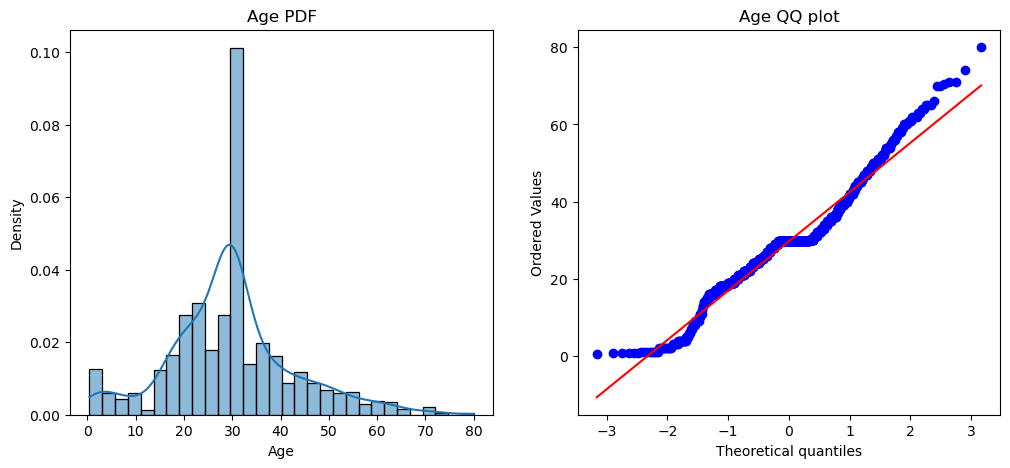

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Distribution of age
sns.histplot(df['Age'], kde=True, stat='density', ax=ax1)
ax1.set_title('Age PDF')

# QQPlot of Age
stats.probplot(x= df['Age'], dist='norm', plot=ax2)
ax2.set_title('Age QQ plot')

plt.show()


In [81]:
df['Age'].skew()

0.4344880940129925

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


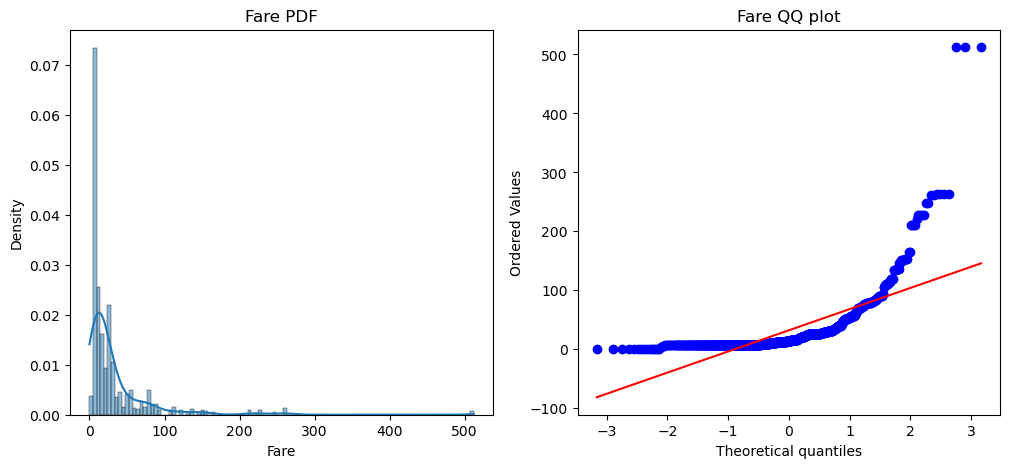

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Distribution of age
sns.histplot(df['Fare'], kde=True, stat='density', ax=ax1)
ax1.set_title('Fare PDF')

# QQPlot of Age
stats.probplot(x= df['Fare'], dist='norm', plot=ax2)
ax2.set_title('Fare QQ plot')

plt.show()

In [83]:
df['Fare'].skew()

4.787316519674893

### <p style =" color:#497665 ">We can see that Age column is somewhat close to normal distribution whearas Fare column is heavily skewed (right skewed --> hence log transform is preferred) </p>

## Accuracy of models without applying function transformer

In [84]:
# creating two classifier objects
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [85]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
print("Accuracy of Logistic Regression: ", clf1.score(X_test, y_test))
print("Accuracy of Decision Tree Classifier: ", clf2.score(X_test, y_test))


Accuracy of Logistic Regression:  0.664804469273743
Accuracy of Decision Tree Classifier:  0.5754189944134078


### cross-validation

In [87]:
# cross-validation
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Accuracy of Logistic Regression: ",np.mean(cross_val_score(clf1,X,y,scoring='accuracy',cv=10)))
print("Accuracy of Decision Tree Classifier: ",np.mean(cross_val_score(clf2,X,y,scoring='accuracy',cv=10)))


Accuracy of Logistic Regression:  0.6589013732833957
Accuracy of Decision Tree Classifier:  0.6577028714107367


## Accuracy of models applying function transformers on both columns

In [88]:
trf = FunctionTransformer(func = np.log1p)

In [89]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [90]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [91]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

print("Accuracy of Logistic Regression: ", clf1.score(X_test_transformed, y_test))
print("Accuracy of Decision Tree Classifier: ", clf2.score(X_test_transformed, y_test))

Accuracy of Logistic Regression:  0.6703910614525139
Accuracy of Decision Tree Classifier:  0.5977653631284916


### cross-validation

In [92]:
# classifier objects
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

# transformer
trf = FunctionTransformer(func = np.log1p)
X_transformed = trf.fit_transform(X)

# cross-validation
print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6633333333333333


## QQ plots before and after log transform

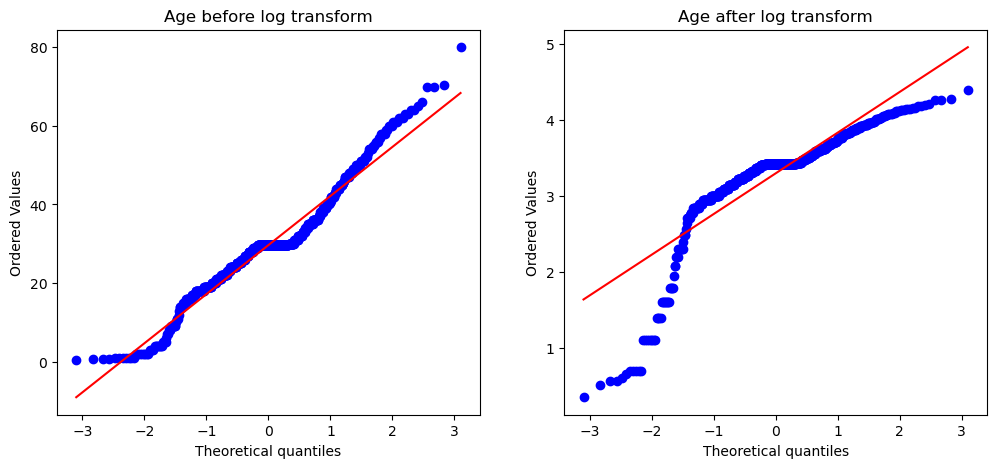

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Before transform
stats.probplot(x = X_train['Age'], dist='norm', plot=ax1)
ax1.set_title('Age before log transform')

# After transform
stats.probplot(x = X_train_transformed['Age'], dist='norm', plot=ax2)
ax2.set_title('Age after log transform')

plt.show()

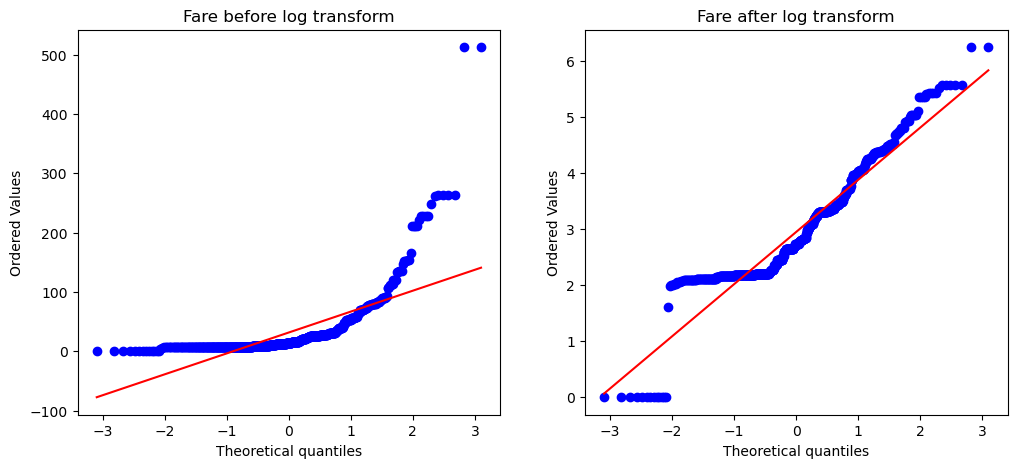

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Before transform
stats.probplot(x = X_train['Fare'], dist='norm', plot=ax1)
ax1.set_title('Fare before log transform')

# After transfrom
stats.probplot(x = X_train_transformed['Fare'], dist='norm', plot=ax2)
ax2.set_title('Fare after log transform')

plt.show()

### <p style =" color:#497665 "> From above graphs, we conclude that the log transform improved the QQ plot of only the Fare column (which was right skewed) but made the QQ plot of Age column worse. Hence, we need to apply log transform to only Fare column  <p>

## Applying Log Transform to only Fare column

In [95]:
trf = ColumnTransformer(
    transformers=[
        ('fare_log_trf', FunctionTransformer(func=np.log1p), ['Fare']),
    ],
    remainder='passthrough',
)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

# classifier objects
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

print("Accuracy of Logistic Regression: ", clf1.score(X_test_transformed, y_test))
print("Accuracy of Decision Tree Classifier: ", clf2.score(X_test_transformed, y_test))

Accuracy of Logistic Regression:  0.664804469273743
Accuracy of Decision Tree Classifier:  0.5921787709497207


### cross-validation

In [96]:
trf = ColumnTransformer(
    transformers=[
        ('fare_log_trf', FunctionTransformer(func=np.log1p), ['Fare']),
    ],
    remainder='passthrough',
)
X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed, y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644569288389512


### <p style =" color:#497665 "> Examining the cross-validation scores, we find that model accuracy has increased, specially that of logistic regression<p>

In [127]:
def transform(transformer):
    y = df.iloc[:, 0]
    X= df.iloc[:, 1:]
    
    # transformations
    trf = ColumnTransformer(
    [
        ('function_transformer', FunctionTransformer(func=transformer), ['Fare'])
    ],
    remainder = 'passthrough'
    )
    
    X_transformed = trf.fit_transform(X)
    
    # classifier objects
    clf1 = LogisticRegression()
    clf2 = DecisionTreeClassifier()
    
    # accuracy of models
    print("LR: ", np.mean(cross_val_score(clf1, X_transformed, y, cv=10, scoring='accuracy')))
    print("DT: ", np.mean(cross_val_score(clf2, X_transformed, y, cv=10, scoring='accuracy')))
    
    # qq plot of Fare before and after transformation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    # qq plot before transform
    stats.probplot(df['Fare'], dist='norm' ,plot=ax1)
    ax1.set_title(f"Fare before {(transformer).__name__ } transform")

    # qq plot after transform
    stats.probplot(X_transformed[:, 0], dist='norm' ,plot=ax2)
    ax2.set_title(f'Fare after {(transformer).__name__} transform')

LR:  0.6589013732833957
DT:  0.6577153558052434


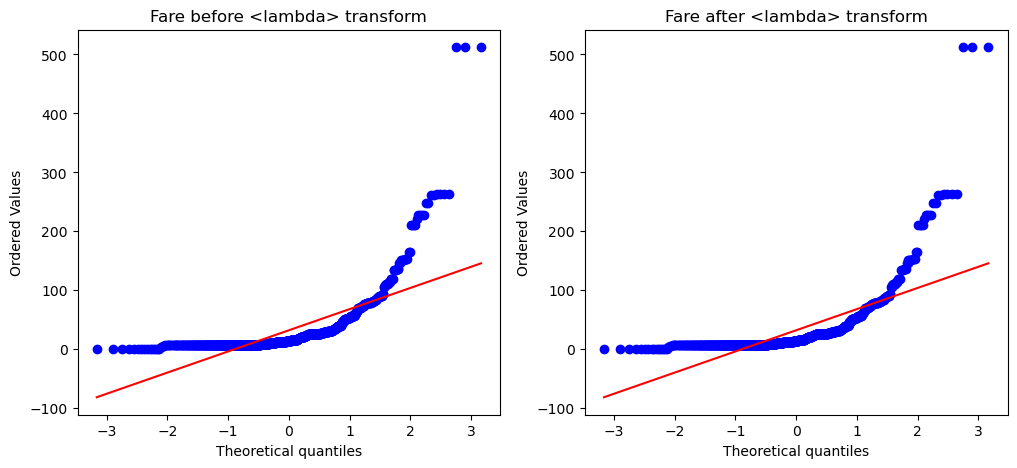

In [137]:
# without any transformation
transform(lambda x: x)

LR:  0.6589013732833957
DT:  0.6599500624219725


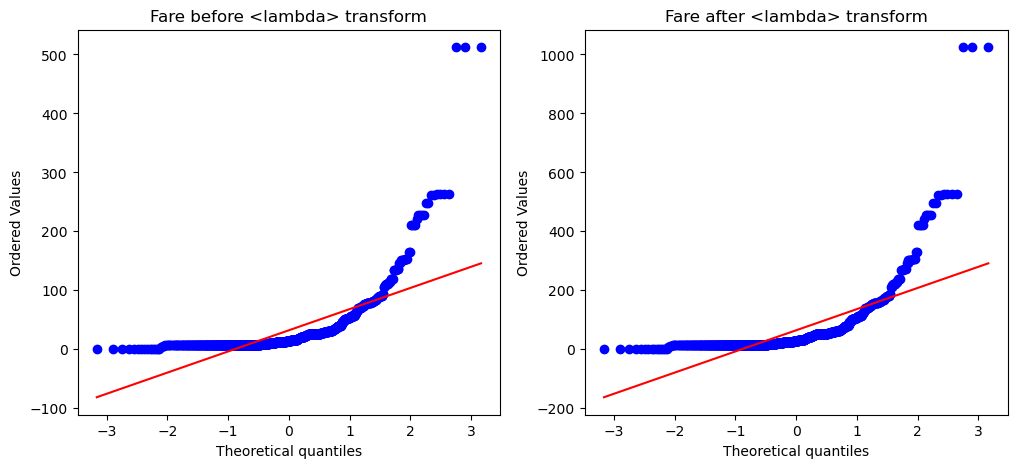

In [128]:
# square transform
transform(lambda x: x*2)

LR:  0.6712609238451936
DT:  0.6633083645443196


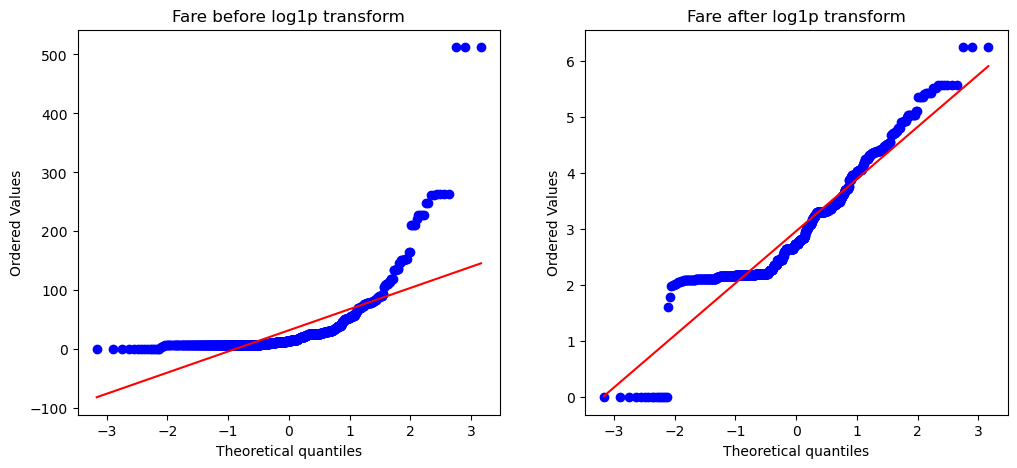

In [133]:
# log transform
transform(np.log1p)

LR:  0.6195131086142323
DT:  0.6071785268414482


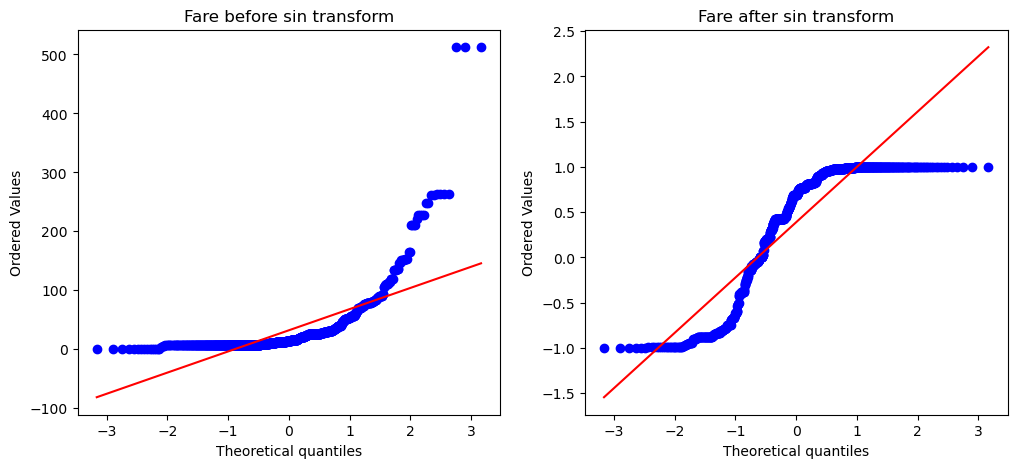

In [132]:
# sin transform
transform(np.sin)

LR:  0.6589013732833957
DT:  0.6610486891385767


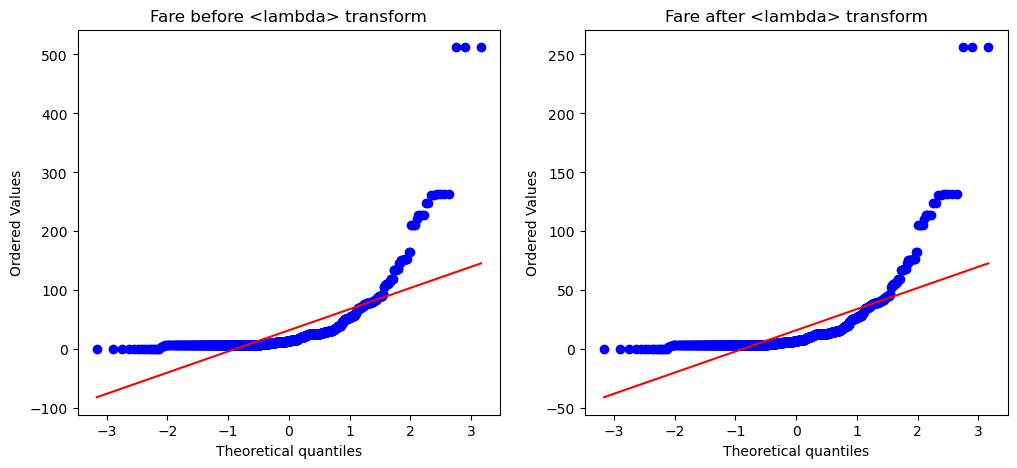

In [135]:
# square root transform
transform(lambda x: x**1/2)

LR:  0.61729088639201
DT:  0.6610861423220974


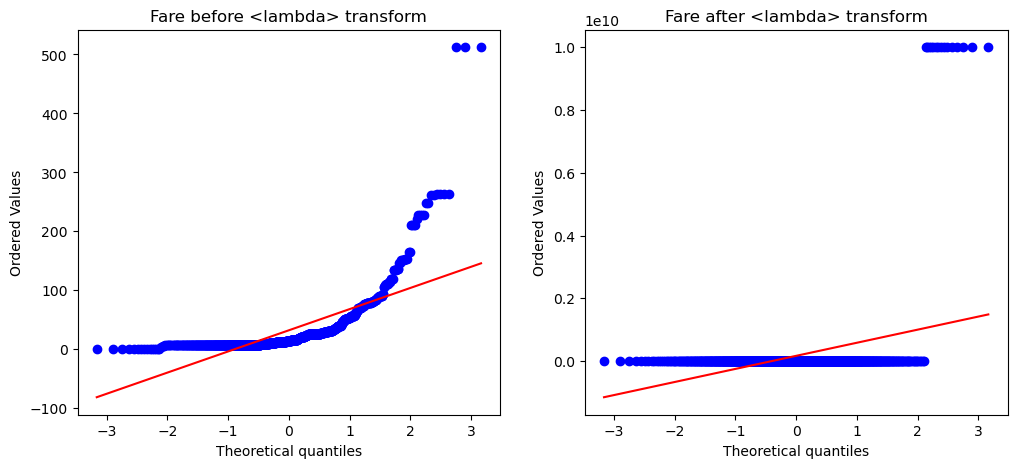

In [148]:
# reciprocal transform
transform(lambda x: 1/ (x+0.0000000001))